<a href="https://colab.research.google.com/github/shivasivangi/Fsds-with-ai-and-agentic-ai/blob/main/multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from pickle import TRUE
drive.mount("/content/drive",force_remount=TRUE)

Mounted at /content/drive


In [5]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-10-14 10:25:09--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.26, 104.192.142.24, 104.192.142.25, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.0s    

2025-10-14 10:25:17 (16.9 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [6]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [8]:
tf.__version__

'2.19.0'

In [9]:
img_height,img_width = 32,32
batch_size=20
train_ds=tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 460 files belonging to 3 classes.


In [10]:
img_height,img_width = 32,32
batch_size=20
train_ds=tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 130 files belonging to 3 classes.


In [11]:
img_height,img_width = 32,32
batch_size=20
train_ds=tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 66 files belonging to 3 classes.


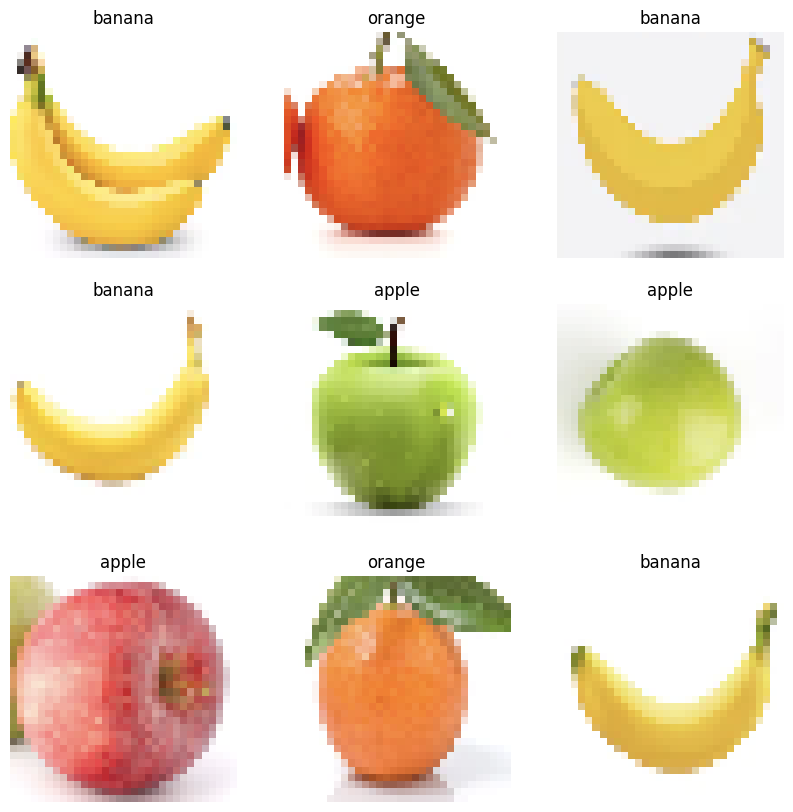

In [13]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="softmax"),
     tf.keras.layers.Dense(3)
    ]
)

In [15]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [23]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

NameError: name 'val_ds' is not defined

In [24]:
model.evaluate(test_ds)

NameError: name 'test_ds' is not defined